In [2]:
!pip install keras==2.15.0
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
# import tensorflow_hub as hub
import optuna
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.applications import ResNet50, InceptionV3, Xception, VGG16
from tensorflow.keras.layers import Dense
import numpy as np
#Image Generator DataAugmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.1 MB/s eta 0:00:0000:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


2024-06-13 16:01:03.601331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 16:01:03.601432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 16:01:03.721421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Directory containing the "Train" folder
directory = "/kaggle/input/whistles-baby-hit-me-up/Up1/tests"

# List of categories (subfolder names)
categories = ["positives", "negatives"]

# Initialize lists to store filenames and categories
filenames = []
category_labels = []

# Iterate through the categories
for category in categories:
    # Path to the current category folder
    category_folder = os.path.join(directory, "train", category)
    # List all filenames in the category folder
    category_filenames = os.listdir(category_folder)
    # Append filenames and corresponding category labels
    filenames.extend(category_filenames)
    category_labels.extend([category] * len(category_filenames))

# Create DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'category': category_labels
})

# Display the first few rows of the DataFrame
print(df.head())

In [ ]:
base_dir = directory

#Data_Dir
data_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")
test_dir_path = os.path.join(base_dir, "test")
# Defining data generator with Data Augmentation
data_gen_augmented = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

print(' training Images:')
train_ds = data_gen_augmented.flow_from_directory(data_dir, 
                                                              target_size = (224, 224), 
                                                              batch_size = 32,
                                                              subset = 'training',
                                                              class_mode = 'categorical')

#Testing Augmented Data
# Defining Validation_generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

print('Unchanged Validation Images:')
validation_ds = data_gen.flow_from_directory(val_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'categorical')

# Defining Validation_generator withour Data Augmentation
data_test_gen = ImageDataGenerator(rescale = 1/255.)

print('Test Validation Images:')
test_ds = data_gen.flow_from_directory(test_dir_path, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'categorical')

In [ ]:
model_paper = tf.keras.models.load_model("/kaggle/input/cnn_v1_xception/tensorflow2/initial_model/1/model_vgg.h5") #tf & keras ==2.15.0

#Early_Stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, 
    restore_best_weights=True,
)

#Fitting Model
history = model_paper.fit(train_ds,
                        epochs= 15,
                        steps_per_epoch = len(train_ds),
                        validation_data = validation_ds,
                        validation_steps = len(validation_ds),
                        callbacks = early_stopping)

In [ ]:
model_paper.save("/kaggle/working/Augmented_dataset.h5")

In [5]:
#model_paper.save("kaggle/working/model_finetuned_vgg.h5")
model_paper= tf.keras.models.load_model("/kaggle/input/cnn_v1_xception/tensorflow2/model_initial_finetuned_95acc/1/model_finetuned_vgg.h5")

51it [00:04, 11.64it/s]

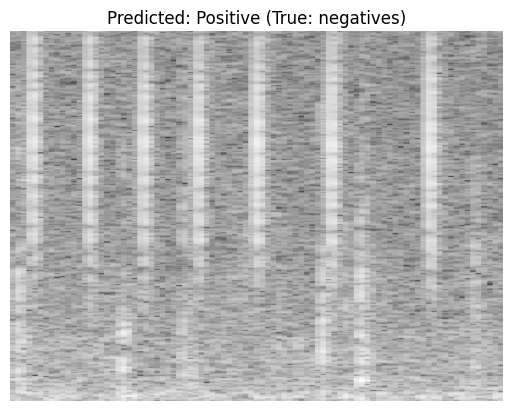

103it [00:13, 11.47it/s]

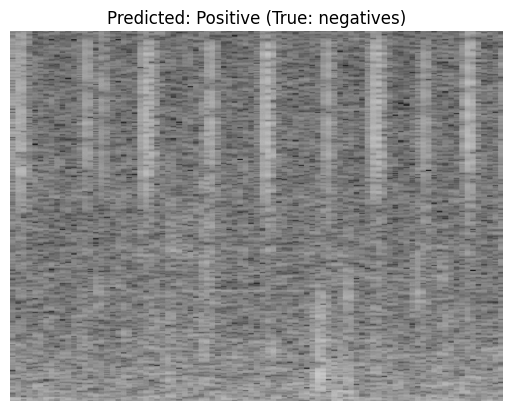

158it [00:23, 11.55it/s]

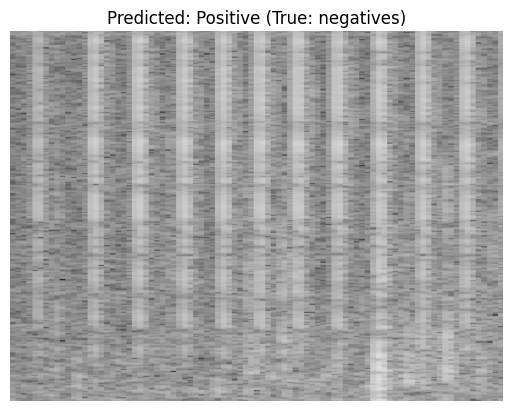

441it [01:10, 11.87it/s]

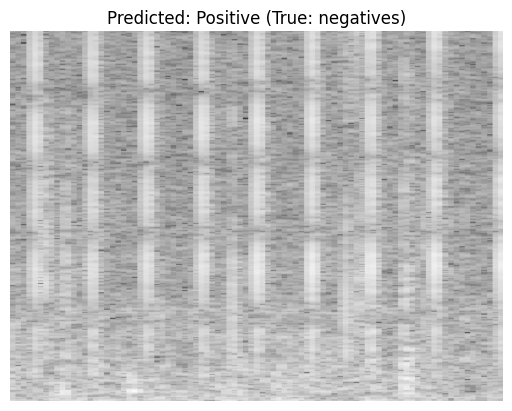

463it [01:17,  6.44it/s]

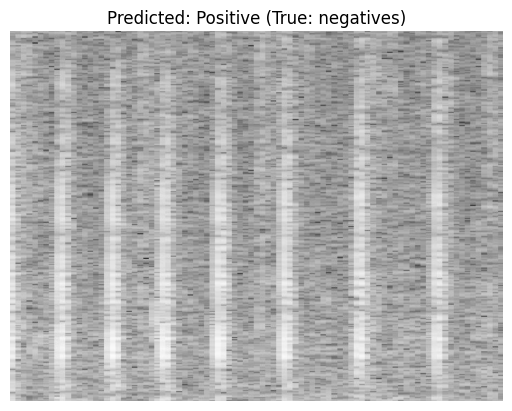

470it [01:20,  4.58it/s]

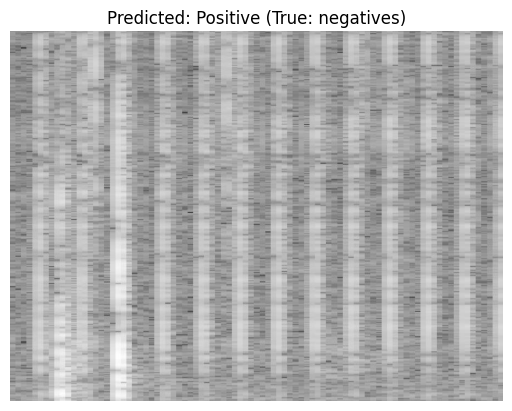

622it [01:34, 11.50it/s]

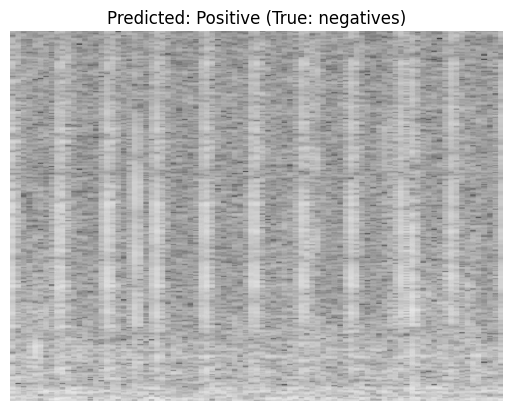

692it [01:53, 11.62it/s]

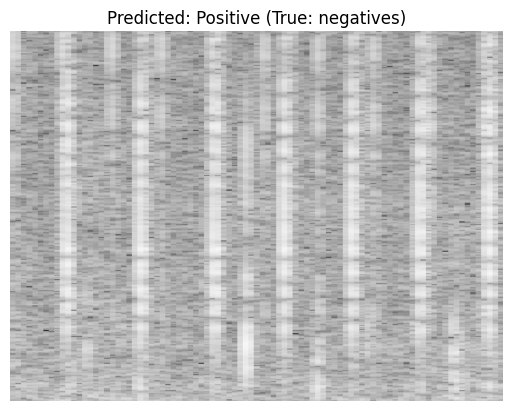

859it [02:14, 11.82it/s]

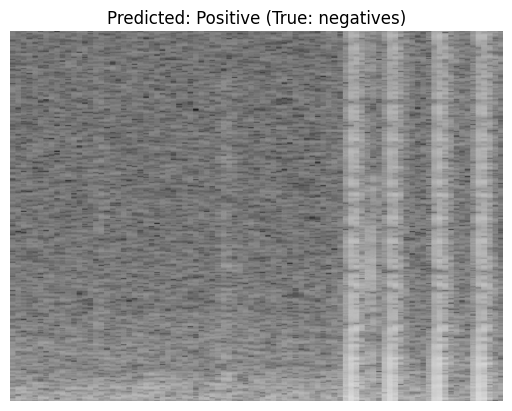

880it [02:29,  6.90it/s]

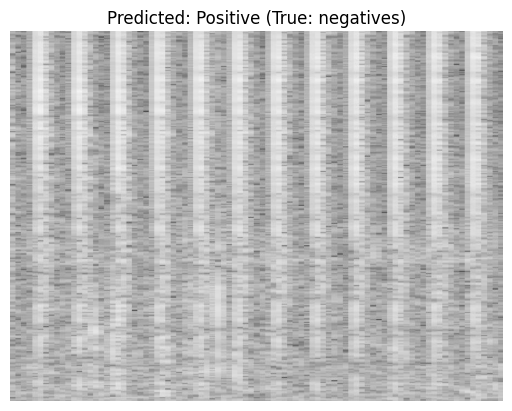

1058it [03:00, 11.66it/s]

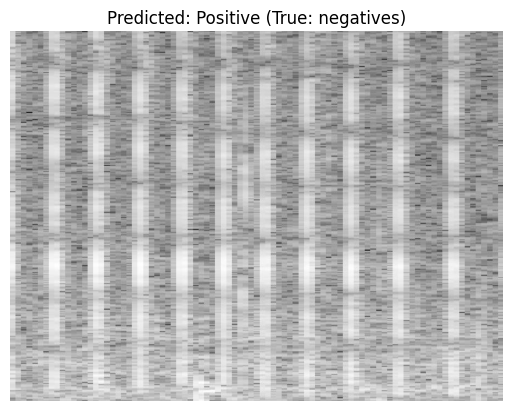

1194it [03:14, 11.06it/s]

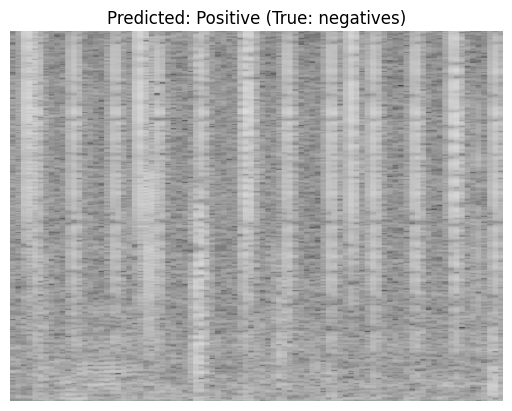

1266it [03:31, 11.69it/s]

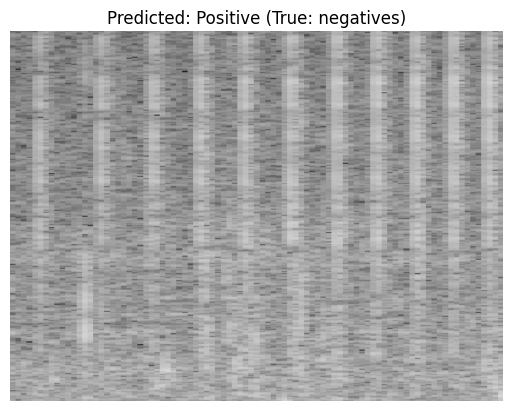

1349it [03:45, 11.44it/s]

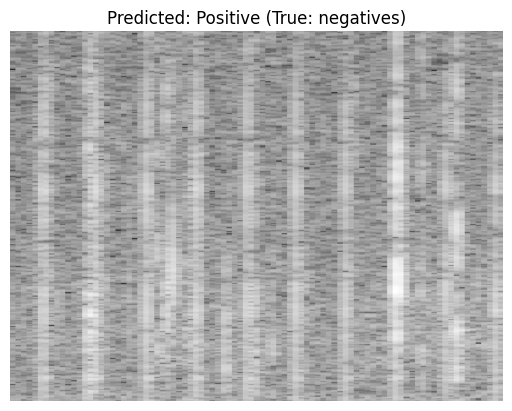

1361it [03:53,  4.52it/s]

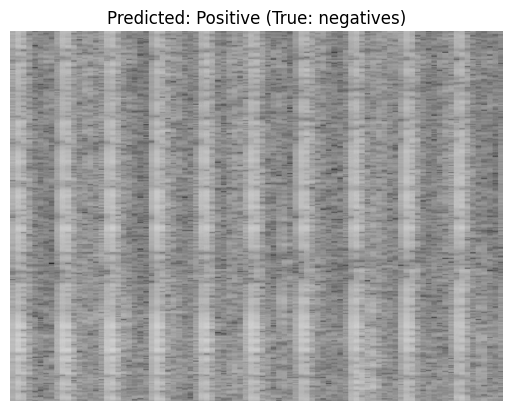

1383it [03:56, 10.76it/s]

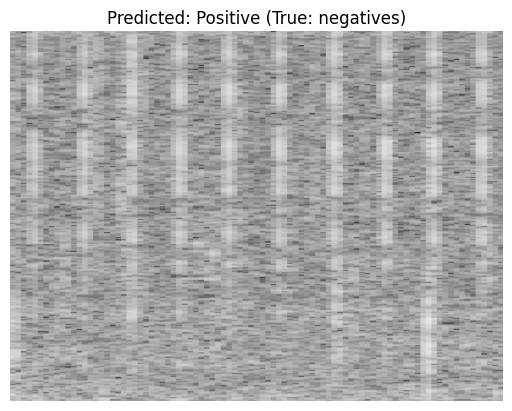

1403it [03:59, 10.12it/s]

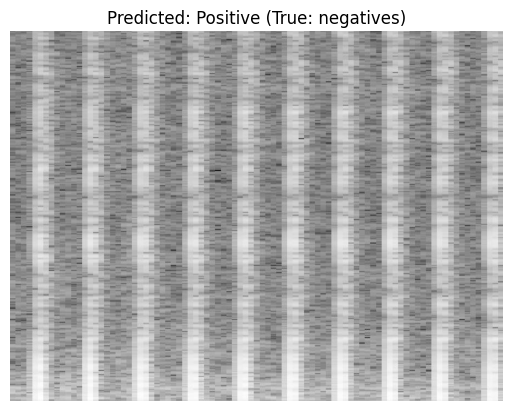

1427it [04:03, 11.09it/s]

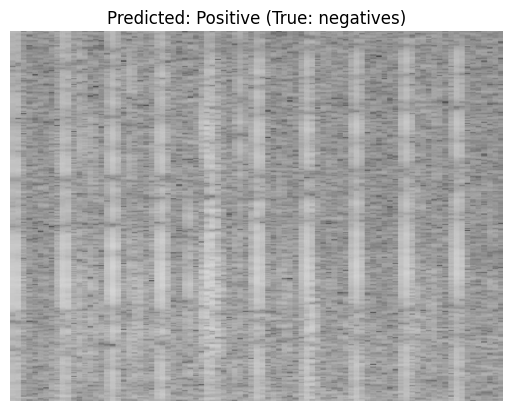

1457it [04:08, 11.50it/s]

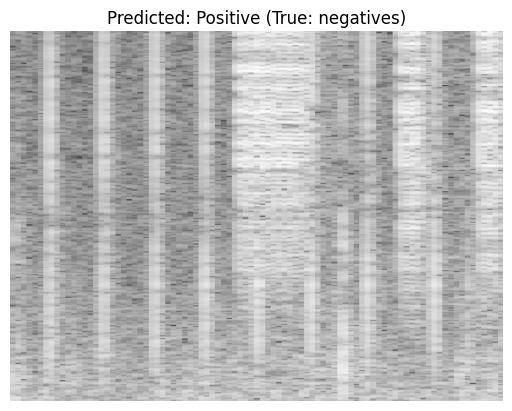

1599it [04:23, 12.18it/s]

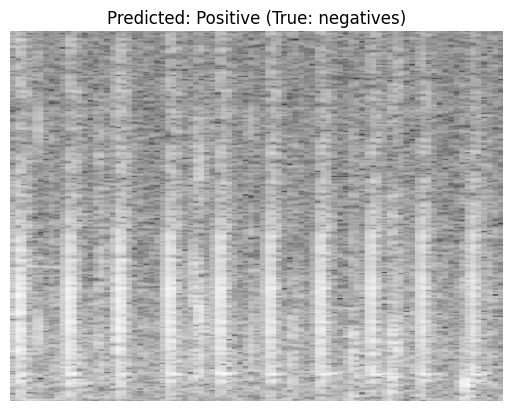

1689it [04:42, 11.82it/s]

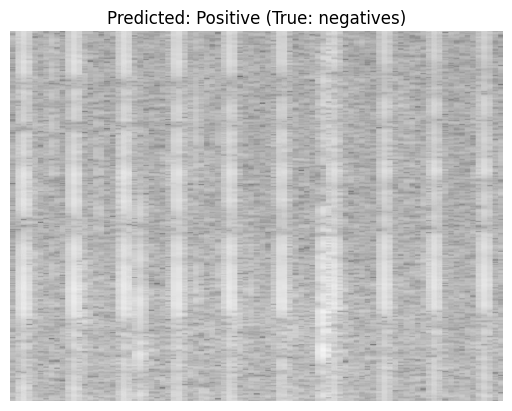

1770it [04:58, 11.40it/s]

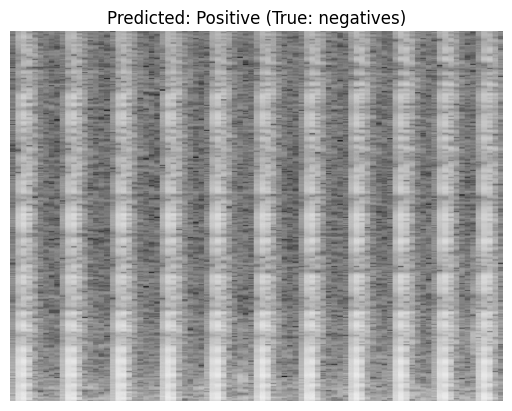

1785it [05:06,  5.82it/s]

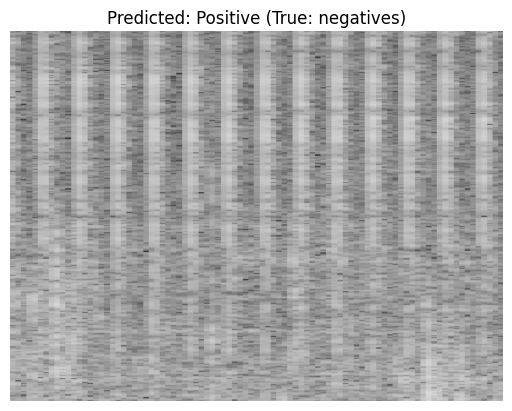

1831it [05:11, 11.70it/s]

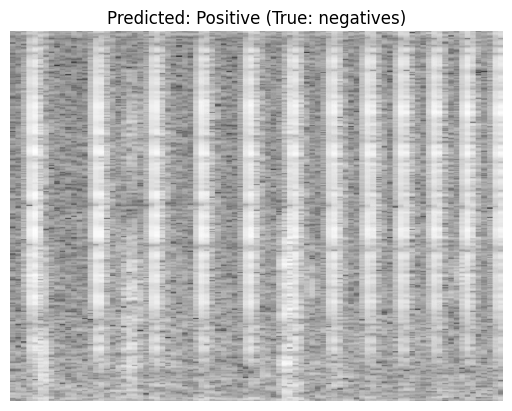

1939it [05:24, 11.61it/s]

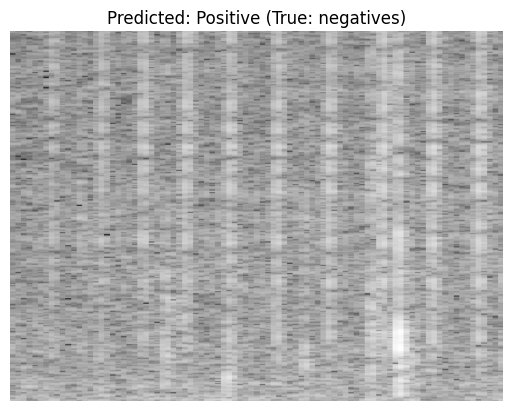

2104it [06:00, 11.08it/s]

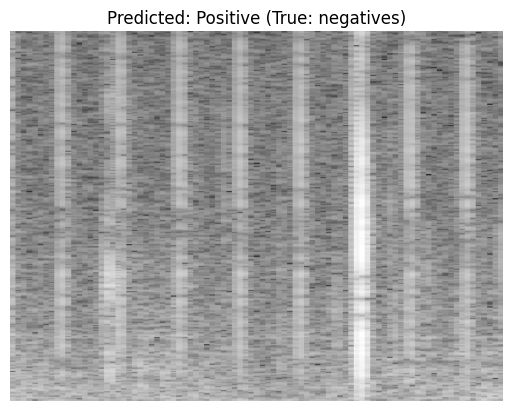

2151it [06:05, 11.36it/s]

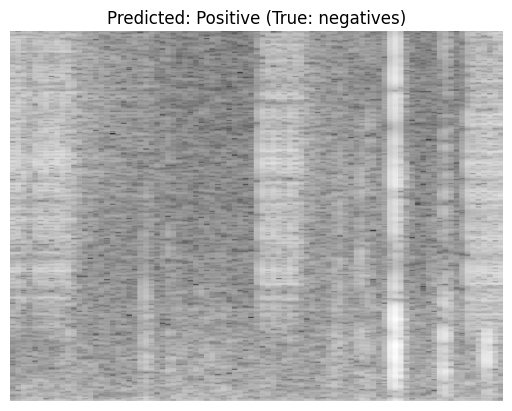

2227it [06:16, 12.21it/s]

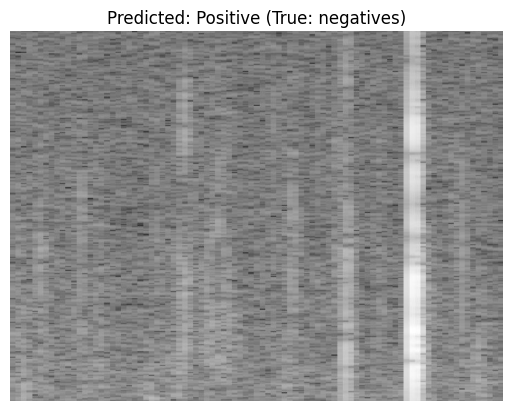

2298it [06:29, 11.52it/s]

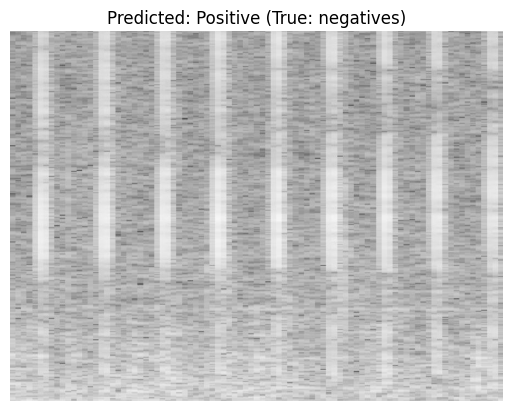

2302it [06:35,  1.40it/s]

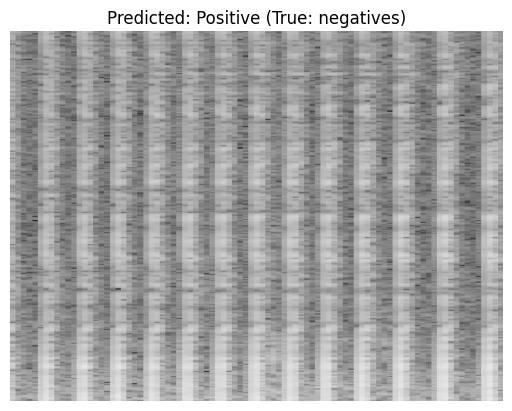

2333it [06:38, 11.17it/s]

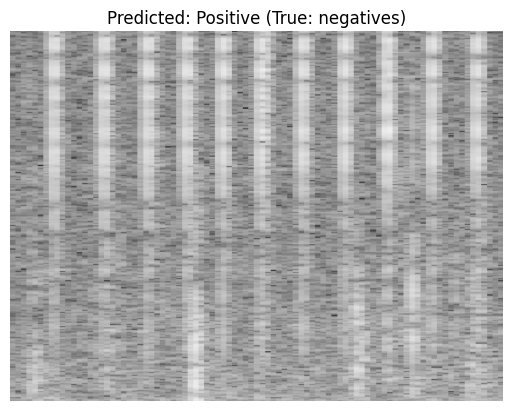

2484it [06:54, 11.18it/s]

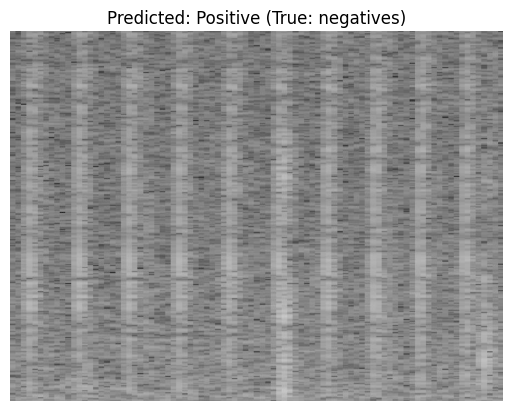

2537it [07:11, 11.55it/s]

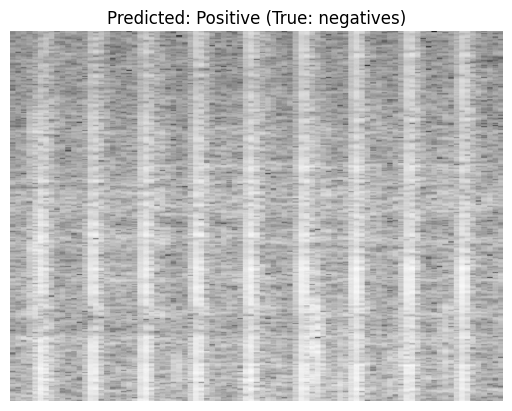

2624it [07:23, 11.95it/s]

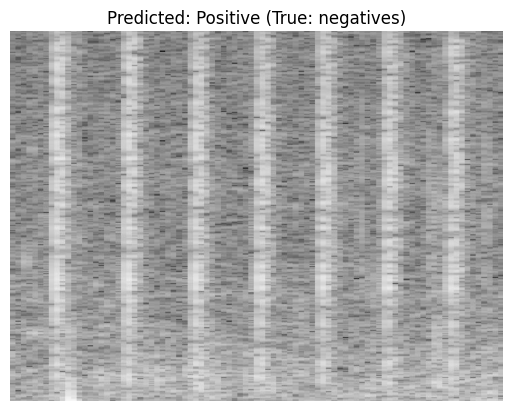

2692it [07:36, 11.94it/s]

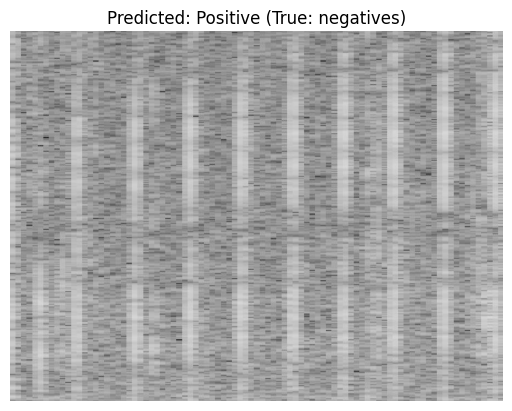

2748it [07:47, 11.90it/s]

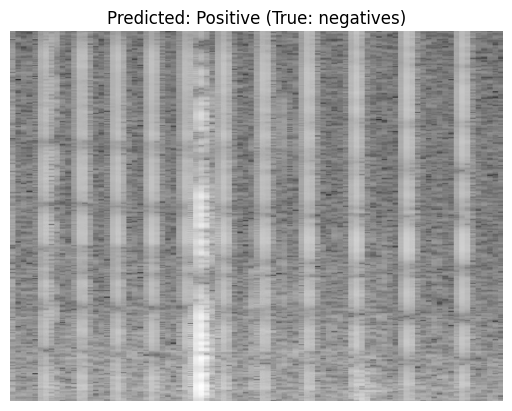

2754it [07:52,  5.83it/s]
Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7e371b51c9d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

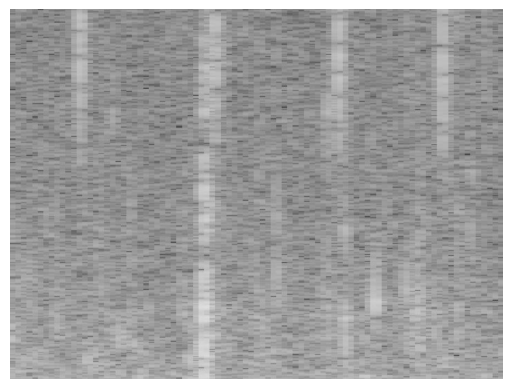

In [11]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tqdm import tqdm 

# List of paths to your single images
image_paths = ['/kaggle/input/whistles-baby-hit-me-up/dataset/media/DOLPHIN_ALEXIS/Analyses_alexis/dataset/_last/tests/validation/positives/Exp_01_Feb_2020_0945am-792.0.jpg', 
               '/kaggle/input/whistles-baby-hit-me-up/dataset/media/DOLPHIN_ALEXIS/Analyses_alexis/dataset/_last/tests/test/negatives/13-11-19-1221-42.4.jpg', 
               '/kaggle/input/whistles-baby-hit-me-up/dataset/media/DOLPHIN_ALEXIS/Analyses_alexis/dataset/_last/tests/validation/positives/13-11-19-1221-1246.0.jpg']
# Intialize true labels
true_labels = ['negatives', 'negatives','positives']

img_paths_neg = [os.path.join("/kaggle/input/whistles-baby-hit-me-up/dataset/media/DOLPHIN_ALEXIS/Analyses_alexis/dataset/_last/tests/train/negatives", i) 
                              for i in os.listdir("/kaggle/input/whistles-baby-hit-me-up/dataset/media/DOLPHIN_ALEXIS/Analyses_alexis/dataset/_last/tests/train/negatives")]
true_labels_neg = ['negatives']*len(img_paths_neg)


model = tf.keras.models.load_model("/kaggle/input/cnn_v1_xception/tensorflow2/initial_model/1/model_vgg.h5")


fp = []
i = 0
# Load and preprocess each image, make predictions, and display them using a loop
for img_path, true_label in tqdm(zip(img_paths_neg, true_labels_neg)):
    
    image_1 = cv2.imread(img_path)
    image = cv2.resize(image_1, (224, 224))
    # image = image.astype(np.float32) / 255.0 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    # Make predictions
    predictions = model.predict(image, verbose = 0)
    actual_prediction = (predictions[0][0] < predictions[0][1]).astype(int)

    # Display the image with true and predicted labels
    # Convert BGR to RGB for displaying with matplotlib
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))  
    plt.axis('off')
    if actual_prediction == 0:
        predicted_label = 'Negative'
    else:
        predicted_label = 'Positive'
    
    if predicted_label == 'Positive': 
        plt.title(f'Predicted: {predicted_label} (True: {true_label})')
        plt.show()
        fp.append(img_path)

In [ ]:
import sys
sys.path.append('/kaggle/input/')
from utility_script import *

#********************* MAIN
model_path = "/kaggle/input/cnn_v1_xception/tensorflow2/initial_model/1/model_vgg.h5"
images_path = directory + "/train/negatives"
positive_dir = "/kaggle/working/tests/train/negatives/train/negatives/positive"
negative_dir = "/kaggle/working/tests/train/negatives/train/negatives/negative"
if not os.path.exists(positive_dir):
    os.makedirs(positive_dir)
if not os.path.exists(negative_dir):
    os.makedirs(negative_dir)
csv_path = "/kaggle/working/tests/whistles.csv"

# the model
model = tf.keras.models.load_model(model_path)

# paths of all files
all_files_path = [f for f in os.listdir(images_path) if isfile(join(images_path, f))]

# lists to store data
record_names = []
positive_initial = []
positive_finish = []
class_1_scores = []

# all predictions results
predictions = []

# reading file paths 1 by 1
for file_path in all_files_path:
    
    # prediction on the given image
    prediction = predict(model, images_path, file_path)
    prediction_1= predict(model_paper, images_path, file_path)
    predictions.append([file_path, prediction, prediction_1])
    
    # if the class 1 has higher confidence than class 0
    if (prediction[0][1] > prediction[0][0]):
        
        # carry the positive image to its folder.
        copy_file(images_path, file_path, positive_dir)
        
        # storing the positive images confidences
        class_1_scores.append((prediction[0][1],prediction_1[0][1]))
        
        # preparing arrays for the csv
        record_names, positive_initial, positive_finish = prepare_csv_data(file_path,
                                                                           record_names,
                                                                           positive_initial,
                                                                           positive_finish)
    else:
        pass
        # carry the negative image to its folder.
        #copy_file(images_path, file_path, negative_dir)
        
    

#saving the csv
save_csv(record_names, positive_initial, positive_finish, class_1_scores, csv_path)